# Load Data
https://developers.google.com/machine-learning/crash-course/california-housing-data-description

## Pandas & Scikit Learn

In [250]:
import pandas as pd

df_train = pd.read_csv('./sample_data/california_housing_train.csv')
df_test = pd.read_csv('./sample_data/california_housing_test.csv')

print('Train:', df_train.shape)
print('Test:', df_test.shape)

Train: (17000, 9)
Test: (3000, 9)


In [251]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


## PySpark & [Spark MLlib](https://spark.apache.org/mllib/)

In [252]:
!pip install pyspark

In [253]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").appName("Spark-ML").getOrCreate()

### inferred schema

In [254]:
%%time
rdd_train = spark.read.csv('./sample_data/california_housing_train.csv',
                           inferSchema=True,
                           header=True)

rdd_test = spark.read.csv('./sample_data/california_housing_test.csv',
                           inferSchema=True,
                           header=True)

CPU times: user 8.93 ms, sys: 3.23 ms, total: 12.2 ms
Wall time: 879 ms


In [255]:
rdd_train.printSchema()

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)



### defined schema

In [256]:
from pyspark.sql.types import StructType, StructField, FloatType

In [257]:
%%time

schema = StructType([StructField("longitude", FloatType(), nullable=True),
                     StructField("latitude", FloatType(), nullable=True),
                     StructField("housing_median_age", FloatType(), nullable=True),
                     StructField("total_rooms", FloatType(), nullable=True),
                     StructField("total_bedrooms", FloatType(), nullable=True),
                     StructField("population", FloatType(), nullable=True),
                     StructField("households", FloatType(), nullable=True),
                     StructField("median_income", FloatType(), nullable=True),
                     StructField("median_house_value", FloatType(), nullable=True)])

rdd_train = spark.read.csv('./sample_data/california_housing_train.csv',
                          schema=schema,
                          header=True)

rdd_test = spark.read.csv('./sample_data/california_housing_test.csv',
                          schema=schema,
                          header=True)

CPU times: user 7.5 ms, sys: 346 µs, total: 7.85 ms
Wall time: 122 ms


In [258]:
print(rdd_train.count())
print(len(rdd_train.columns))

17000
9


In [259]:
print(rdd_test.count())
print(len(rdd_test.columns))

3000
9


In [260]:
rdd_train.take(5)

[Row(longitude=-114.30999755859375, latitude=34.189998626708984, housing_median_age=15.0, total_rooms=5612.0, total_bedrooms=1283.0, population=1015.0, households=472.0, median_income=1.4936000108718872, median_house_value=66900.0),
 Row(longitude=-114.47000122070312, latitude=34.400001525878906, housing_median_age=19.0, total_rooms=7650.0, total_bedrooms=1901.0, population=1129.0, households=463.0, median_income=1.8200000524520874, median_house_value=80100.0),
 Row(longitude=-114.55999755859375, latitude=33.689998626708984, housing_median_age=17.0, total_rooms=720.0, total_bedrooms=174.0, population=333.0, households=117.0, median_income=1.6509000062942505, median_house_value=85700.0),
 Row(longitude=-114.56999969482422, latitude=33.63999938964844, housing_median_age=14.0, total_rooms=1501.0, total_bedrooms=337.0, population=515.0, households=226.0, median_income=3.191699981689453, median_house_value=73400.0),
 Row(longitude=-114.56999969482422, latitude=33.56999969482422, housing_med

In [261]:
rdd_train.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0|
|  -114.57|   33.57|              20.0|     1454.0|         326.0|     624.0|     262.0|        1.925|           65500.0|
+---------+--------+----

In [262]:
rdd_train.printSchema()

root
 |-- longitude: float (nullable = true)
 |-- latitude: float (nullable = true)
 |-- housing_median_age: float (nullable = true)
 |-- total_rooms: float (nullable = true)
 |-- total_bedrooms: float (nullable = true)
 |-- population: float (nullable = true)
 |-- households: float (nullable = true)
 |-- median_income: float (nullable = true)
 |-- median_house_value: float (nullable = true)



# Explore Data

## Select

In [263]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [264]:
df_train[['population', 'total_bedrooms']].head(10)

,population,total_bedrooms
0,1015.0,1283.0
1,1129.0,1901.0
2,333.0,174.0
3,515.0,337.0
4,624.0,326.0
5,671.0,236.0
6,1841.0,680.0
7,375.0,168.0
8,3134.0,1175.0
9,787.0,309.0


In [265]:
rdd_train.select('population','total_bedrooms').show(10)

+----------+--------------+
|population|total_bedrooms|
+----------+--------------+
|    1015.0|        1283.0|
|    1129.0|        1901.0|
|     333.0|         174.0|
|     515.0|         337.0|
|     624.0|         326.0|
|     671.0|         236.0|
|    1841.0|         680.0|
|     375.0|         168.0|
|    3134.0|        1175.0|
|     787.0|         309.0|
+----------+--------------+
only showing top 10 rows



## GroupBy

In [266]:
df_train.value_counts('housing_median_age', sort=False)

housing_median_age
1.0        2
2.0       49
3.0       46
4.0      161
5.0      199
6.0      129
7.0      151
8.0      178
9.0      172
10.0     226
11.0     208
12.0     192
13.0     249
14.0     347
15.0     416
16.0     635
17.0     576
18.0     478
19.0     412
20.0     383
21.0     373
22.0     323
23.0     382
24.0     389
25.0     461
26.0     503
27.0     397
28.0     400
29.0     374
30.0     384
31.0     384
32.0     458
33.0     513
34.0     567
35.0     692
36.0     715
37.0     437
38.0     318
39.0     302
40.0     249
41.0     232
42.0     308
43.0     286
44.0     296
45.0     235
46.0     196
47.0     175
48.0     135
49.0     111
50.0     112
51.0      32
52.0    1052
dtype: int64

In [267]:
df_counts = df_train.groupby('housing_median_age')['housing_median_age'].count()
df_counts

housing_median_age
1.0        2
2.0       49
3.0       46
4.0      161
5.0      199
6.0      129
7.0      151
8.0      178
9.0      172
10.0     226
11.0     208
12.0     192
13.0     249
14.0     347
15.0     416
16.0     635
17.0     576
18.0     478
19.0     412
20.0     383
21.0     373
22.0     323
23.0     382
24.0     389
25.0     461
26.0     503
27.0     397
28.0     400
29.0     374
30.0     384
31.0     384
32.0     458
33.0     513
34.0     567
35.0     692
36.0     715
37.0     437
38.0     318
39.0     302
40.0     249
41.0     232
42.0     308
43.0     286
44.0     296
45.0     235
46.0     196
47.0     175
48.0     135
49.0     111
50.0     112
51.0      32
52.0    1052
Name: housing_median_age, dtype: int64

In [268]:
rdd_counts = rdd_train.groupBy("housing_median_age").count().sort("housing_median_age", ascending=True)
rdd_counts

DataFrame[housing_median_age: float, count: bigint]

In [269]:
rdd_counts.show(10)

+------------------+-----+
|housing_median_age|count|
+------------------+-----+
|               1.0|    2|
|               2.0|   49|
|               3.0|   46|
|               4.0|  161|
|               5.0|  199|
|               6.0|  129|
|               7.0|  151|
|               8.0|  178|
|               9.0|  172|
|              10.0|  226|
+------------------+-----+
only showing top 10 rows



## ToPandas

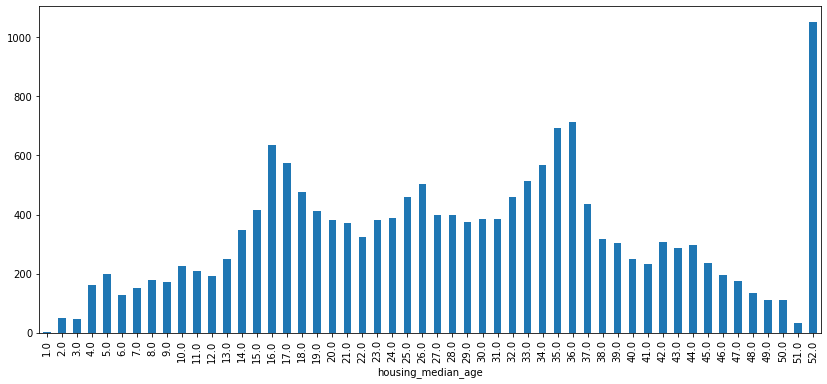

In [270]:
df_counts.plot.bar(x='housing_median_age', figsize=(14, 6))

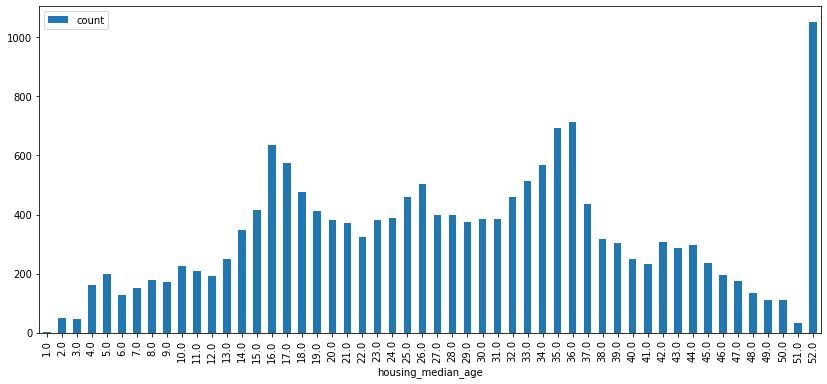

In [271]:
rdd_counts.toPandas().plot.bar(x='housing_median_age', figsize=(14, 6))

## Describe

In [272]:
df_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [273]:
import pyspark.sql.functions as F

rdd_train.describe().select("summary",
                            F.round("longitude", 4).alias("long"),
                            F.round("latitude", 4).alias("lat"),
                            F.round("housing_median_age", 4).alias("medage"),
                            F.round("total_rooms", 4).alias("totrooms"),
                            F.round("total_bedrooms", 4).alias("totbdrms"),
                            F.round("population", 4).alias("pop"),
                            F.round("households", 4).alias("houshlds"),
                            F.round("median_income", 4).alias("medinc"),
                            F.round("median_house_value", 4).alias("medhv")).show()

+-------+---------+-------+-------+---------+--------+---------+--------+-------+-----------+
|summary|     long|    lat| medage| totrooms|totbdrms|      pop|houshlds| medinc|      medhv|
+-------+---------+-------+-------+---------+--------+---------+--------+-------+-----------+
|  count|  17000.0|17000.0|17000.0|  17000.0| 17000.0|  17000.0| 17000.0|17000.0|    17000.0|
|   mean|-119.5621|35.6252|28.5894|2643.6644|539.4108|1429.5739|501.2219| 3.8836|207300.9124|
| stddev|   2.0052| 2.1373|12.5869|2179.9471|421.4995| 1147.853|384.5208| 1.9082|115983.7644|
|    min|  -124.35|  32.54|    1.0|      2.0|     1.0|      3.0|     1.0| 0.4999|    14999.0|
|    max|  -114.31|  41.95|   52.0|  37937.0|  6445.0|  35682.0|  6082.0|15.0001|   500001.0|
+-------+---------+-------+-------+---------+--------+---------+--------+-------+-----------+



# Feature Engineering

Rooms per household: the average number of rooms per household in the block

In [274]:
df_train['rooms_per_household'] = df_train['total_rooms'] / df_train['households']
df_test['rooms_per_household'] = df_test['total_rooms'] / df_test['households']

In [275]:
df_train.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,11.889831
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,16.522678
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,6.153846
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,6.641593
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,5.549618


In [276]:
from pyspark.sql.functions import col

rdd_train = rdd_train.withColumn('rooms_per_household', col("total_rooms")/col("households"))
rdd_test = rdd_test.withColumn('rooms_per_household', col("total_rooms")/col("households"))

In [277]:
rdd_train.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+-------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|rooms_per_household|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+-------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0| 11.889830508474576|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|  16.52267818574514|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|  6.153846153846154|
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0| 6.6415929203539825|
|  -11

##❓ Exercise:
Compute "population per household": the average number of inhabitants per household in the block

##❓ Exercise:
Compute "bedroom ratio": the ratio of rooms which are bedrooms

# Feature Selection

In [278]:
X_train = df_train.copy()
y_train = X_train.pop('median_house_value')

X_test = df_test.copy()
y_test = X_test.pop('median_house_value')

In [279]:
from pyspark.ml.feature import VectorAssembler

feature_columns = rdd_train.columns
feature_columns.remove('median_house_value')

assembler = VectorAssembler(inputCols=feature_columns,
                            outputCol="features")

rdd_train = assembler.transform(rdd_train)
rdd_test = assembler.transform(rdd_test)

In [280]:
rdd_train.select('features').show(5, truncate=False)

+--------------------------------------------------------------------------------------------------------------+
|features                                                                                                      |
+--------------------------------------------------------------------------------------------------------------+
|[-114.30999755859375,34.189998626708984,15.0,5612.0,1283.0,1015.0,472.0,1.4936000108718872,11.889830508474576]|
|[-114.47000122070312,34.400001525878906,19.0,7650.0,1901.0,1129.0,463.0,1.8200000524520874,16.52267818574514] |
|[-114.55999755859375,33.689998626708984,17.0,720.0,174.0,333.0,117.0,1.6509000062942505,6.153846153846154]    |
|[-114.56999969482422,33.63999938964844,14.0,1501.0,337.0,515.0,226.0,3.191699981689453,6.6415929203539825]    |
|[-114.56999969482422,33.56999969482422,20.0,1454.0,326.0,624.0,262.0,1.9249999523162842,5.549618320610687]    |
+-----------------------------------------------------------------------------------------------

# Transforms

In [281]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((-1, 1))

X_train = pd.DataFrame(scaler.fit_transform(X_train),
                       columns=X_train.columns,
                       index=X_train.index)

X_test = pd.DataFrame(scaler.transform(X_test),
                       columns=X_test.columns,
                       index=X_test.index)

X_train.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household
13627,-0.527888,0.013815,0.058824,-0.797654,-0.805090,-0.894616,-0.782602,-0.184894,-0.929755
64,0.754980,-0.904357,-0.137255,-0.923184,-0.884544,-0.935817,-0.872718,-0.856926,-0.958683
16878,-0.890438,0.466525,0.254902,-0.893397,-0.857852,-0.943048,-0.861536,-0.804016,-0.943996
12138,-0.420319,0.264612,0.176471,-0.773560,-0.755742,-0.883405,-0.746752,-0.601674,-0.932978
7431,0.195219,-0.708820,0.294118,-0.891762,-0.861266,-0.936601,-0.866140,-0.541372,-0.940585


In [282]:
from pyspark.ml.feature import MinMaxScaler

scaler = MinMaxScaler(min=-1,
                      max=1,
                      inputCol="features",
                      outputCol="features_scaled")

scaler = scaler.fit(rdd_train)
rdd_train = scaler.transform(rdd_train)
rdd_test = scaler.transform(rdd_test)

In [283]:
rdd_train.select("features_scaled").show(10, truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features_scaled                                                                                                                                                                     |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[1.0,-0.6493097262620222,-0.4509803921568627,-0.7042309213127719,-0.6021104903786467,-0.943271952689257,-0.8450912678835718,-0.8629398230007774,-0.8434219945754646]                |
|[0.9681267634424371,-0.604675740592474,-0.2941176470588236,-0.5967839725846844,-0.4103041589075108,-0.9368816390593907,-0.8480513073507647,-0.81791974895758,-0.7777371623476547]   |
|[0.9501992077284847,-0.7555796535962948,-0.37254901960784315,-0.9621457756689074,-0.

# SciKit Learn

## Train

In [284]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.3,
                   l1_ratio=0.8)
                   
model.fit(X_train, y_train)

print(model.coef_)
print(model.intercept_)

[-45041.56418427 -51202.07947636  27890.53853353  14276.77752947
  12123.05816763  -4117.73577095  12383.39756911 161511.95285517
   4586.39405959]
304670.0220226354


## Evaluate

In [285]:
from sklearn.metrics import mean_squared_error

pred_test = model.predict(X_test)

print(f'RMSE: {mean_squared_error(pred_test, y_test, squared=False):.2f}')

RMSE: 84982.61


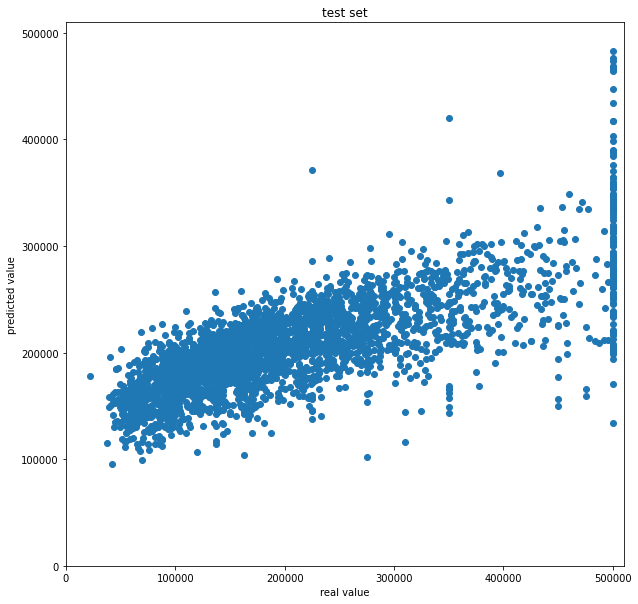

In [286]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(y_test, pred_test)
plt.xlabel('real value')
plt.ylabel('predicted value')
plt.title('test set')
plt.xlim([0, 510000])
plt.ylim([0, 510000])
plt.show()

# Spark MLlib

## Train

In [287]:
from pyspark.ml.regression import LinearRegression

model = LinearRegression(featuresCol='features_scaled',
                         labelCol="median_house_value",
                         predictionCol='prediction', 
                         maxIter=10,
                         regParam=0.3,
                         elasticNetParam=0.8,
                         standardization=False)

model = model.fit(rdd_train)

In [288]:
print(model.coefficients)
print(model.intercept)

[-211282.6324499204,-198543.9027294821,31579.51813088998,-109936.91439249789,288401.36671575805,-808490.2464503922,274668.14387589396,291972.5691270008,86047.53652663517]
-6032.010916821873


## Evaluate

In [289]:
pred_test = model.transform(rdd_test)

In [290]:
pred_test.select("median_house_value", "prediction").show()

+------------------+------------------+
|median_house_value|        prediction|
+------------------+------------------+
|          344700.0|355624.42980652774|
|          176500.0| 212097.8983122432|
|          270500.0| 277167.6536384163|
|          330000.0|309931.49159208266|
|           81700.0|115963.56857255189|
|           67000.0|  78435.0286017124|
|           67000.0| 79757.29659157281|
|          166900.0| 214958.3944327476|
|          194400.0|214865.34558312068|
|          164200.0| 101794.8128521019|
|          125000.0|140139.67253604738|
|           58300.0|114470.59457465964|
|          252600.0|268870.84329019743|
|          231200.0|222870.84339865617|
|          222500.0| 271263.4795339701|
|          153100.0|150432.74212371453|
|          181300.0| 76946.01866630008|
|          137500.0|100561.01426084817|
|          300000.0| 330228.1990780205|
|          414300.0| 345872.5748965885|
+------------------+------------------+
only showing top 20 rows



In [291]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(predictionCol='prediction', 
                                labelCol='median_house_value',
                                metricName='rmse')

print(f'RMSE: {evaluator.evaluate(pred_test):.2f}')

RMSE: 70048.25


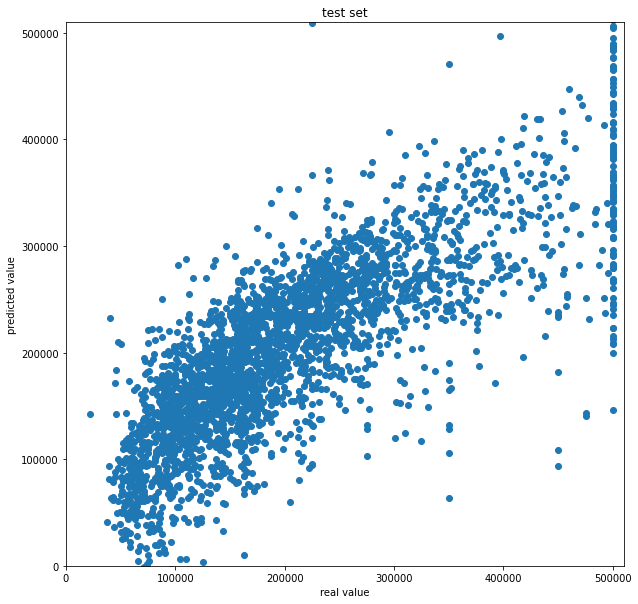

In [292]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(y_test, pred_test.select('prediction').collect())
plt.xlabel('real value')
plt.ylabel('predicted value')
plt.xlim([0, 510000])
plt.ylim([0, 510000])
plt.title('test set')
plt.show()

# Stop Session

In [293]:
spark.stop()